In [73]:
import pandas as pd
from matplotlib import pyplot as plt


# Загружаем и обрабатываем данные

In [105]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [106]:
x = data.drop(columns = 'HeartDisease')
x   

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [107]:
y = data['HeartDisease']

In [108]:
categorials = x.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [109]:
x[categorials] = x[categorials].fillna('nan')

In [110]:
x_int =x.select_dtypes(['int', 'float']).columns.tolist()
x[x_int].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [111]:
dummy_x = pd.get_dummies(x[categorials], columns = categorials)


In [112]:
X = pd.concat([x[x_int].fillna(-999), dummy_x], axis=1)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


 # Визуализируем
 Тут я решила посмотреть, насколько сильно по одному признаку (холестерин) можно судить о наличии ССЗ. Но судя по распределению - нельзя

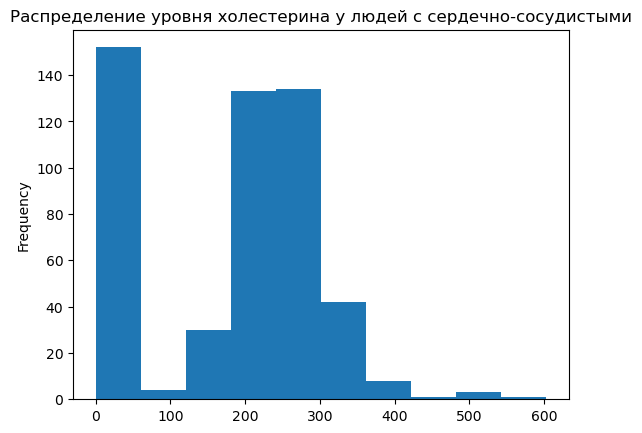

In [114]:
data_disease = data.loc[data['HeartDisease'] == 1]
import matplotlib.pyplot as plt
data_disease['Cholesterol'].plot(kind = 'hist', title = 'Распределение уровня холестерина у людей с сердечно-сосудистыми' )
plt.show()

# Дерево решений

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [116]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier (max_depth = 10)
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [117]:
tree_train = tree_class.score(X_train, y_train)
tree_train

0.9797507788161994

In [118]:
tree_test = tree_class.score(X_test, y_test)
tree_test

0.7789855072463768

Качество снизилось на 20 процентов - дерево переобучилось

# Случайный лес

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=10)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [120]:
forest_train = clf_rf.score(X_train, y_train)
forest_train

1.0

In [121]:
forest_test = clf_rf.score(X_test, y_test)
forest_test

0.894927536231884

Тоже есть переобучение

### Смотрим на важность признаков

In [90]:
imp = pd.Series(clf_rf.feature_importances_)
imp.index = pd.Series(X_train.columns)

In [91]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.152730
Oldpeak              0.102279
ST_Slope_Flat        0.097955
MaxHR                0.097743
Cholesterol          0.085901
Age                  0.082526
ChestPainType_ASY    0.066876
RestingBP            0.066419
ExerciseAngina_N     0.063054
ExerciseAngina_Y     0.041623
ChestPainType_ATA    0.024636
FastingBS            0.021808
Sex_F                0.019996
Sex_M                0.014464
RestingECG_LVH       0.013303
ChestPainType_NAP    0.013217
RestingECG_Normal    0.011080
RestingECG_ST        0.010478
ST_Slope_Down        0.007334
ChestPainType_TA     0.006579
dtype: float64

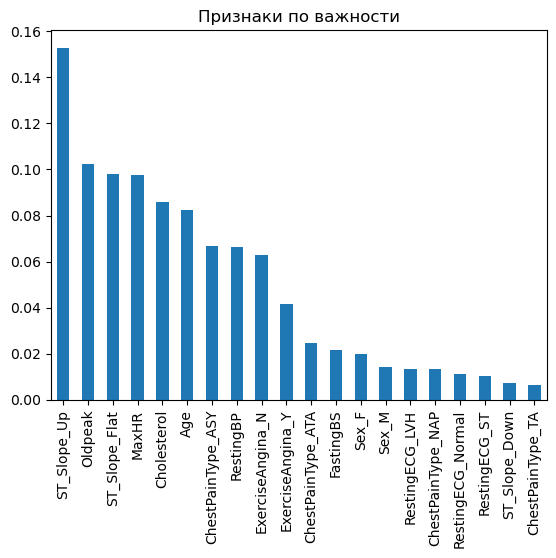

In [92]:
imp.plot(kind = 'bar', title = 'Признаки по важности')
plt.show()

Как видим, наиболее важными оказались отклонения сегмента ST, ЧСС, холестерин и возраст

# Bagging

In [124]:
from sklearn.ensemble import  BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [125]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, random_state=10)

In [126]:
bag_train = bagging.score(X_train, y_train)
bag_train

0.9439252336448598

In [127]:
bag_test = bagging.score(X_test, y_test)
bag_test

0.855072463768116

Тоже как-будто есть переобучение, но результат гораздо лучше, чем на предыдущих моделях

# Stacking

In [128]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
Classifier = StackingClassifier(
    [
        ('Tree', DecisionTreeClassifier()),
        ('Forest', RandomForestClassifier())
    ], LinearSVC())

In [129]:
Classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Tree', DecisionTreeClassifier()),
                               ('Forest', RandomForestClassifier())],
                   final_estimator=LinearSVC())

In [130]:
stack_train = Classifier.score(X_train, y_train)
stack_train

1.0

In [131]:
stack_test = Classifier.score(X_test, y_test)
stack_test

0.8731884057971014

И тут переобучение

# Сравниваем метрики

In [104]:
results = pd.DataFrame(columns=['test/train','Score', 'Model'])

results.loc[len(results)] = ['train',tree_train,'Tree']
results.loc[len(results)] = ['test',tree_test,'Tree']
results.loc[len(results)] = ['train',forest_train,'Forest']
results.loc[len(results)] = ['test',forest_test,'Forest']

results.loc[len(results)] = ['train',bag_train,'Bagging']
results.loc[len(results)] = ['test',bag_test,'Bagging']

results.loc[len(results)] = ['train',stack_train,'Stacking']
results.loc[len(results)] = ['test', stack_test,'Stacking']

results

,test/train,Score,Model
0,train,0.979751,Tree
1,test,0.768116,Tree
2,train,1.000000,Forest
3,test,0.894928,Forest
4,train,0.943925,Bagging
5,test,0.855072,Bagging
6,train,1.000000,Stacking
7,test,0.891304,Stacking


# Выводы
С этими данными лучше всего сработал бэггинг, обученный на дереве решений. Остальные модели показывали довольно сильное переобучение